In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#importation des données 
data=pd.read_csv('C:/Users/yazid/OneDrive/Bureau/Formation/P16-Self-Organizing-Maps/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [15]:
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [16]:
X=data.iloc[:, :-1].values
y=data.iloc[:,-1].values

In [17]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [18]:
# entrainement du som 
from minisom import MiniSom

In [19]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)


In [20]:
som.random_weights_init(X)


In [21]:
som.train_random(data = X, num_iteration = 100)

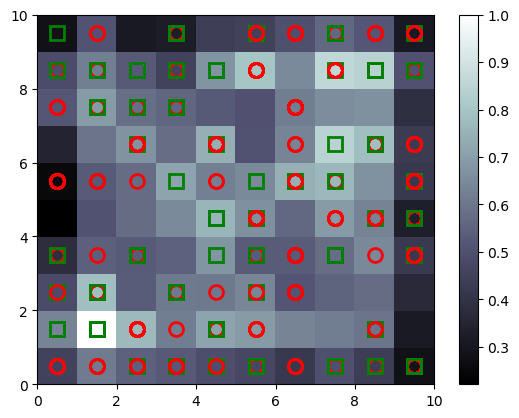

In [23]:
#visualisation des résultats 
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,2)], mappings[(8,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [29]:
frauds.shape

(10, 15)

In [30]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15590434
15593345
15646190
15689692
15672357
15661412
15799785
15602456
15642098
15571571


# Giga étude de cas 

In [31]:
customers = data.iloc[:, 1:].values

In [33]:
#créer la variable dépendante 
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [34]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [36]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [37]:
ann = tf.keras.models.Sequential()

In [38]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [39]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [40]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 30)

Epoch 1/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0672 - accuracy: 0.9870
Epoch 2/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0642 - accuracy: 0.9870
Epoch 3/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0614 - accuracy: 0.9870
Epoch 4/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0594 - accuracy: 0.9870
Epoch 5/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0577 - accuracy: 0.9870
Epoch 6/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0560 - accuracy: 0.9870
Epoch 7/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0542 - accuracy: 0.9870
Epoch 8/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0533 - accuracy: 0.9870
Epoch 9/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0520 - accuracy: 0.9884
Epoch 10/30
690/690 [==============================] - 1s 1ms/step - loss: 0.0511 - accuracy: 0.9884

In [43]:
y_pred = ann.predict(customers)

22/22 [==============================] - 0s 1ms/step


In [45]:
y_pred = np.concatenate((data.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [46]:
print(y_pred)

[[1.57901130e+07 4.06111450e-10]
 [1.57785890e+07 5.28902468e-08]
 [1.56844400e+07 1.27255177e-07]
 ...
 [1.56024560e+07 4.70380634e-01]
 [1.56420980e+07 8.91171992e-01]
 [1.57997850e+07 9.45886493e-01]]
